<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Decision Making with Business Statistics</center></font>
<center><font size=5>Week 4: Project: E-News Express</font></center>

## Define Problem Statement and Objectives

Problem Statement

The objective of this analysis is to determine whether the new landing page leads to higher user engagement and improved conversion performance compared to the existing page, and to understand whether user behavior varies across preferred language groups.

Key objectives/Questions to be answered:
- Do users spend more time on the new landing page than on the existing landing page?
- Is the conversion rate higher for users exposed to the new landing page compared to the old page?
- Does conversion depend on a user’s preferred language?
- For users exposed to the new landing page, does the mean time spent differ across language groups?

## Import all the necessary libraries

In [129]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [131]:

data = pd.read_csv("abtest.csv")






## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [132]:
#view first few rows
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [133]:
#view last few rows
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [134]:
# checking shape of the data
data.shape

(100, 6)

In [135]:
#getting statistical summary for the variables
data.describe(include="all")


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [136]:
#cheking for null data
data.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [137]:
#cheking for duplicates
data.duplicated().sum()

np.int64(0)

### Univariate Analysis

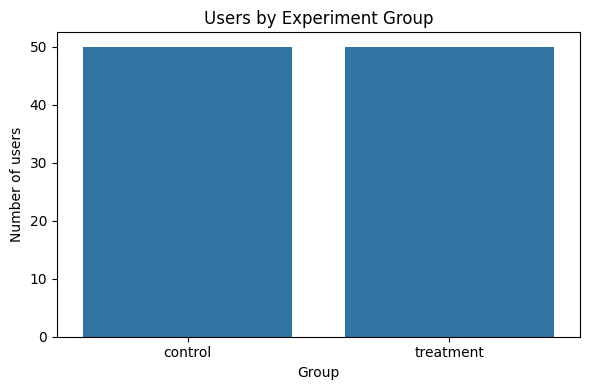

In [138]:
#bar plot to visualize number of users by experiment groupo
plt.figure(figsize=(6, 4))
sns.countplot(
    x="group",
    data=data
)

plt.title("Users by Experiment Group")
plt.xlabel("Group")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()


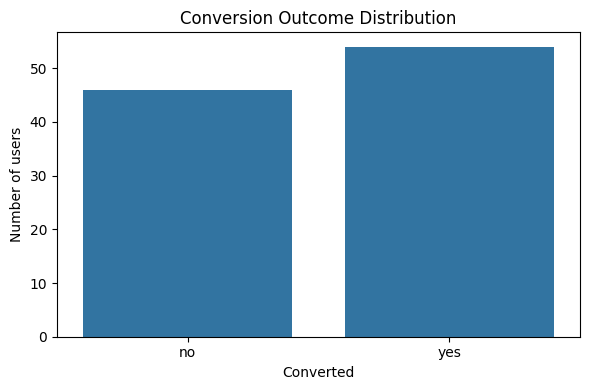

In [139]:
#bar plot to visualize number of users by conversion rate
plt.figure(figsize=(6, 4))
sns.countplot(
    x="converted",
    data=data
)

plt.title("Conversion Outcome Distribution")
plt.xlabel("Converted")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()


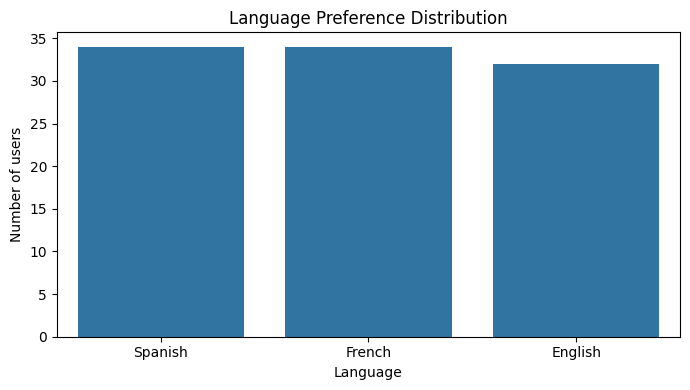

In [140]:
#bar plot to visualize number of users by language
plt.figure(figsize=(7, 4))
sns.countplot(
    x="language_preferred",
    data=data,
    order=data["language_preferred"].value_counts().index
)

plt.title("Language Preference Distribution")
plt.xlabel("Language")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()


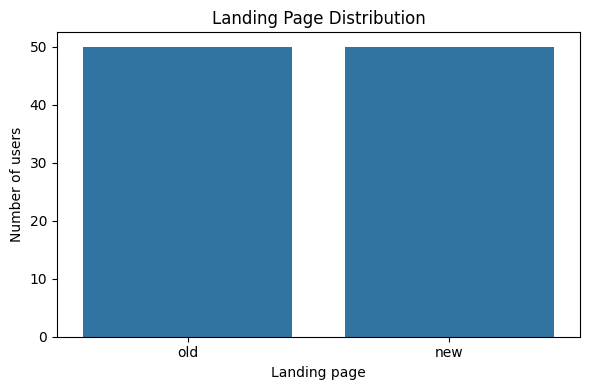

In [141]:
#bar plot to visualize number of users by landing page
plt.figure(figsize=(6, 4))
sns.countplot(
    x="landing_page",
    data=data
)

plt.title("Landing Page Distribution")
plt.xlabel("Landing page")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()


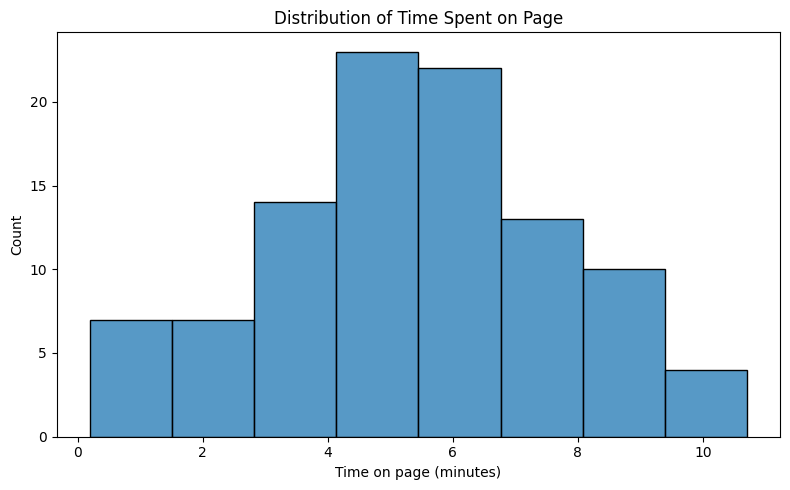

In [142]:
#histogram of time spent on page
plt.figure(figsize=(8, 5))
sns.histplot(
    data["time_spent_on_the_page"],
)

plt.title("Distribution of Time Spent on Page")
plt.xlabel("Time on page (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

###Insights:
- The experiment groups are perfectly balanced, with the same number of users assigned to the control and treatment groups.
- The distribution shows a slightly higher number of converted users compared to non-converted users, indicating that more than half of the users in the experiment completed the subscription action.
- User distribution across preferred languages is relatively balanced, with Spanish and French having slightly more users than English.
- The old and new landing pages were exposed to an equal number of users, confirming that traffic was evenly split between both page versions during the experiment.
- Time spent on the page is concentrated between approximately 4 and 7 minutes, with fewer users spending very short or very long times.

### Bivariate Analysis

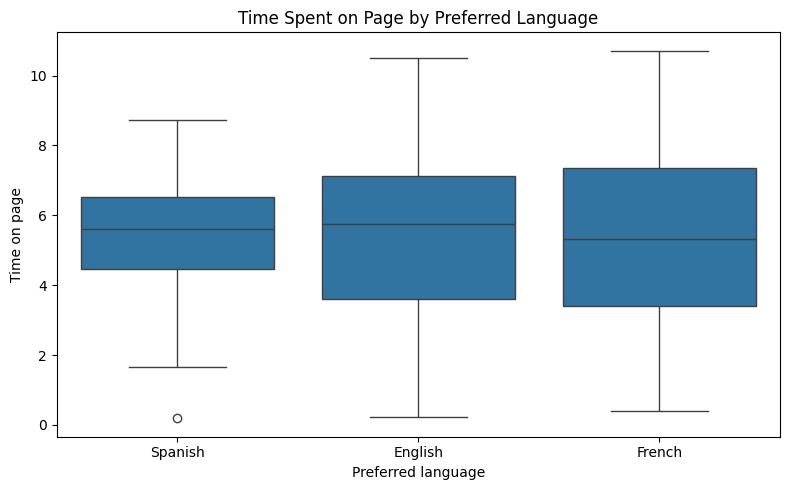

In [143]:
#boxplot to compare median times of time spent by language
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    x="language_preferred",
    y="time_spent_on_the_page"
)

plt.title("Time Spent on Page by Preferred Language")
plt.xlabel("Preferred language")
plt.ylabel("Time on page")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Conversion rate by experiment group')

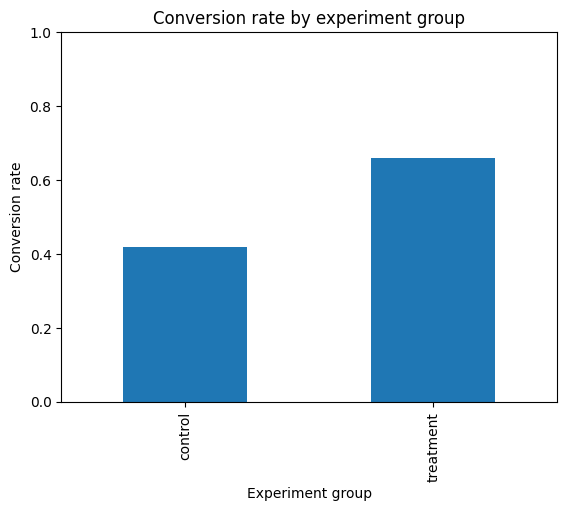

In [144]:
#barplot to visualize conversion rate by group
conv_by_group = (
    data.groupby("group")["converted"]
        .apply(lambda x: (x == "yes").mean())
)

ax = conv_by_group.plot(kind="bar", ylim=(0, 1))
ax.set_xlabel("Experiment group")
ax.set_ylabel("Conversion rate")
ax.set_title("Conversion rate by experiment group")



Text(0.5, 1.0, 'Conversion rate by language')

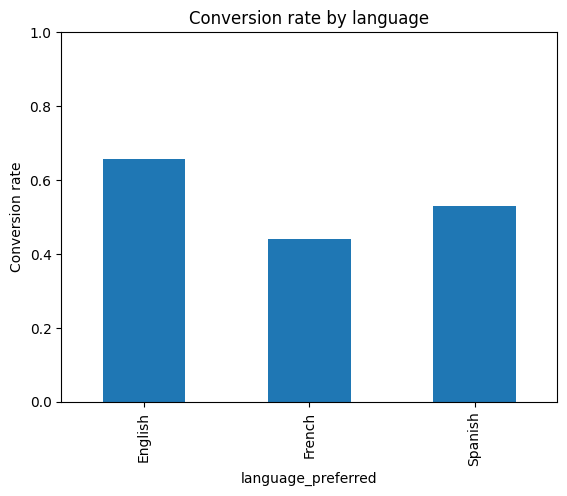

In [145]:
#barplot to visualize conversion rate by language
conv_by_group = (
    data.groupby("language_preferred")["converted"]
        .apply(lambda x: (x == "yes").mean())
)

ax = conv_by_group.plot(kind="bar", ylim=(0, 1))
ax.set_xlabel("language_preferred")
ax.set_ylabel("Conversion rate")
ax.set_title("Conversion rate by language")

###Insights:

- The median time spent on the page is similar across Spanish, English, and French users.
- The conversion rate for users exposed to the new landing page (treatment group) is noticeably higher than that of users exposed to the existing landing page (control group), indicating a potential positive impact of the new page on user conversion.
- Conversion rates vary across preferred language groups, with English users showing the highest observed conversion rate and French users the lowest. However, the differences are moderate.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

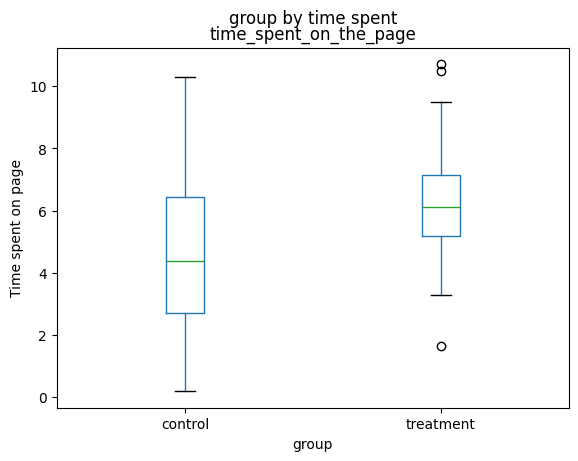

In [146]:
#boxplot to compare median time spent in new and old pages
data.boxplot(
    column="time_spent_on_the_page",
    by="group",
    grid=False
)

plt.suptitle("group by time spent")
plt.xlabel("group")
plt.ylabel("Time spent on page")
plt.show()

The boxplot shows that the treatment group has a higher median and lower variability in time spent compared to the control group, suggesting that users spend more time in the new page

### Step 1: Define the null and alternate hypotheses

Ho = mean time spent on the new page = mean time spent on the old page 𝐻0:𝜇1=𝜇2

Ha = mean time spent on the old page < mean time spent on the new page
𝐻a:𝜇1<𝜇2

### Step 2: Select Appropriate test

two-sample test

### Step 3: Decide the significance level

5%

### Step 4: Collect and prepare data

In [147]:

data1 = data[["group", "time_spent_on_the_page"]]


In [148]:
control_time = data1[data1["group"] == "control"]["time_spent_on_the_page"]
treatment_time = data1[data1["group"] == "treatment"]["time_spent_on_the_page"]

In [149]:
control_time.head()

,time_spent_on_the_page
0,3.48
3,3.02
5,5.28
7,6.53
9,2.08


In [150]:
treatment_time.head()

,time_spent_on_the_page
1,7.13
2,4.40
4,4.75
6,5.25
8,10.71


In [151]:
print("Mean time (control):", control_time.mean())
print("Mean time (treatment):", treatment_time.mean())

print("Std dev (control):", round(control_time.std(), 2))
print("Std dev (treatment):", round(treatment_time.std(), 2))

Mean time (control): 4.532400000000001
Mean time (treatment): 6.2232
Std dev (control): 2.58
Std dev (treatment): 1.82


### Step 5: Calculate the p-value

In [152]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    treatment_time,
    control_time,
    equal_var=False,
    alternative="greater"
)

print("t-statistic:", t_stat)
print("One-sided p-value:", p_value)



t-statistic: 3.7867702694199856
One-sided p-value: 0.0001392381225166549


Given the sample sizes are sufficiently large (approximately 50 users per group), the t-test is robust to moderate deviations from normality.

### Step 6: Compare the p-value with $\alpha$

In [153]:
a = 0.05
if p_value < a:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### Step 7:  Draw inference

Since the p_value is less than the significance level, we reject the null hypothesis. This provides statistically significant evidence that users spend more time on the new landing page compared to the old landing page, and therefore the new page is successfully engaging people for more time.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Visualization

Text(0.5, 1.0, 'Conversion rate by experiment group')

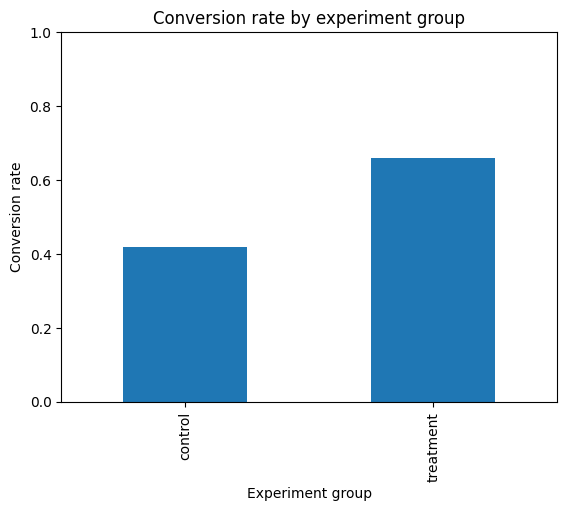

In [154]:
#barplot to visualize conversion rate by group
conv_by_group = (
    data.groupby("group")["converted"]
        .apply(lambda x: (x == "yes").mean())
)

ax = conv_by_group.plot(kind="bar", ylim=(0, 1))
ax.set_xlabel("Experiment group")
ax.set_ylabel("Conversion rate")
ax.set_title("Conversion rate by experiment group")



###Hypothesis:

Ho: conversion rate of control group = conversion rate of treatment group

Ha: conversion rate of control group < conversion rate of treatment

###Appropiate test:
Two-proportion z-test

### Significance level:
5%

###Prepare data

In [155]:
data2 = data[["group", "converted"]]

In [156]:
data2.head()


,group,converted
0,control,no
1,treatment,yes
2,treatment,no
3,control,no
4,treatment,yes


In [157]:
# For conversion rate comparison (control vs treatment)
data ["group"].value_counts()

,count
group,
control,50
treatment,50


In [158]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# successes (converted = yes)
control_success = (data2[data2["group"] == "control"]["converted"] == "yes").sum()
treatment_success = (data2[data2["group"] == "treatment"]["converted"] == "yes").sum()

# sample sizes
control_n = (data2["group"] == "control").sum()
treatment_n = (data2["group"] == "treatment").sum()


###Calculate p value

In [159]:
count = np.array([control_success, treatment_success])
nobs = np.array([control_n, treatment_n])

z_stat, p_value = proportions_ztest(
    count,
    nobs,
    alternative="smaller"
)

print("Z statistic:", z_stat)
print("P-value:", p_value)


Z statistic: -2.4077170617153842
P-value: 0.008026308204056278


###Compare a with p_value

In [160]:
a = 0.05
if p_value < a:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


###Draw inference:
Since the p_value is less than the significance level, we reject the null hypothesis. This means that there is enough statistically significant evidence that the conversion rate for the treatment group is higher than that of the control group. Therefore, the new landing page is more effective at converting users into subscribers.

## 3. Is the conversion and preferred language are independent or related?

###Hypothesis

𝐻0:  conversion rate is independent of language.

𝐻𝑎:  conversion rate is dependent on language.


###Appropiate test:
Chi-square test

###Significance level:
5%

###Prepare data

In [161]:
data3 = data[["converted", "language_preferred"]]
data3.head()

,converted,language_preferred
0,no,Spanish
1,yes,English
2,no,Spanish
3,no,French
4,yes,Spanish


In [162]:

from scipy.stats import chi2_contingency

#create contingency table
contingency_table = pd.crosstab(
    data3["language_preferred"],
    data3["converted"]
)

contingency_table


converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


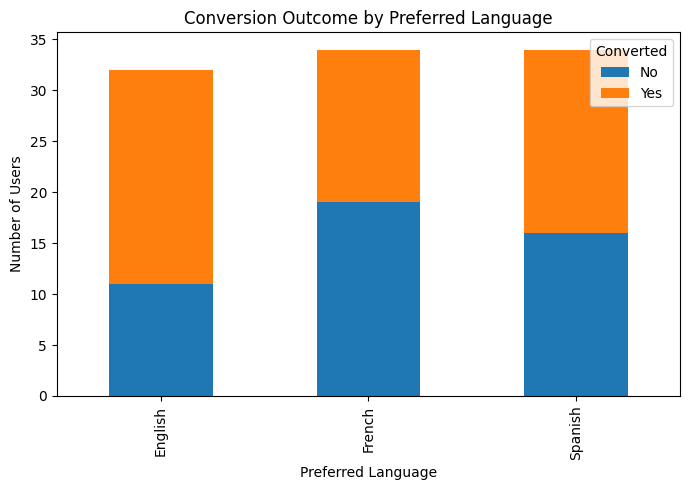

In [163]:
import matplotlib.pyplot as plt
#visualize converted rates by language
contingency_table.plot(
    kind="bar",
    stacked=True,
    figsize=(7, 5)
)

plt.title("Conversion Outcome by Preferred Language")
plt.xlabel("Preferred Language")
plt.ylabel("Number of Users")
plt.legend(title="Converted", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


###CAlcultate p value

In [164]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square statistic: 3.0930306905370832
P-value: 0.2129888748754345


In [165]:
#Compare a with p value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


###Draw inference:
Since the p-value is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is no statistically significant evidence to suggest that conversion status depends on preferred language.

## 4. Is the time spent on the new page same for the different language users?

###Hypothesis

𝐻0:  mean time spent on the new page is the same for the different language users

𝐻𝑎:  mean time spent on the new page is not the same for the different language users

###Approtiate test:
One way ANOVA

###Significance level:
5%

###Prepare data

In [166]:
data4 = data[data["group"] == "treatment"][["time_spent_on_the_page", "language_preferred"]]
data4.head()

,time_spent_on_the_page,language_preferred
1,7.13,English
2,4.40,Spanish
4,4.75,Spanish
6,5.25,French
8,10.71,French


###Try assumptions

In [167]:
# Assumption 1: Normality
# import the required function
from scipy import stats

for lang in data4["language_preferred"].unique():
    w, p = stats.shapiro(
        data4[data4["language_preferred"] == lang]["time_spent_on_the_page"]
    )
    print(f"{lang}: p-value = {p}")


English: p-value = 0.8863443479691289
Spanish: p-value = 0.09006862258526895
French: p-value = 0.32137149516853786


All p-values > 0.05, therefore Normality assumption holds for all language groups and we proceed with an ANOVA test

In [168]:
#Assumption 2: Homogeneity of Variance
#import the required function

from scipy.stats import levene

english = data4[data4["language_preferred"] == "English"]["time_spent_on_the_page"]
spanish = data4[data4["language_preferred"] == "Spanish"]["time_spent_on_the_page"]
french  = data4[data4["language_preferred"] == "French"]["time_spent_on_the_page"]

stat, p = levene(english, spanish, french)
print("Levene p-value:", p)


Levene p-value: 0.46711357711340173


Since P value 0.467 > 0.05, therefore homogeneity of variance assumption holds

###Calculate p value

In [169]:
# import the required function
from scipy.stats import f_oneway

# perform one-way ANOVA test
test_stat, p_value = f_oneway(
    data4.loc[data4["language_preferred"] == "English", "time_spent_on_the_page"],
    data4.loc[data4["language_preferred"] == "Spanish", "time_spent_on_the_page"],
    data4.loc[data4["language_preferred"] == "French",  "time_spent_on_the_page"]
)

print("The p-value is", p_value)


The p-value is 0.43204138694325955


In [170]:
###Compare a with p value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


###Conclusion:
Since the p_value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no statistically significant evidence of a difference in time spent on the new landing page across language preferences.

## Conclusion and Business Recommendations

From the two-sample test performed, we conclude that there is statistically significant evidence that users spend more time on the new landing page compared to the old landing page. From the two-proportion z-test, we conclude that there is statistically significant evidence that the conversion rate for the treatment group is higher than that of the control group. Based on the results of this experiment, the new landing page demonstrates improved performance in both user engagement and conversion metrics.

Furthermore, based on the chi-square and one-way ANOVA tests, there is no statistically significant evidence that conversion rate or time spent differs across preferred language groups. This suggests that the observed improvements are consistent across languages within the scope of the experiment.

Final recommendation: Based on the experimental results and the analyzed sample, E-news Express should consider rolling out the new landing page while continuing to monitor performance and validating these results on a larger user base.

___

In [183]:
from google.colab import drive
drive.mount('/content/drive')








Mounted at /content/drive


In [184]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab_Notebooks/EPaniaguaENews_Express_Learner_Notebook_Full_Code2.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/EPaniaguaENews_Express_Learner_Notebook_Full_Code2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 697924 bytes to /content/drive/MyDrive/Colab_Notebooks/EPaniaguaENews_Express_Learner_Notebook_Full_Code2.html
